# Assignment 3: Sentiment Analysis

# Import Data
Import the preprocessed data

In [1]:
import pandas as pd

headers = ['sentiment', 'tweet_id', 'tweet']

def load_data(filename):
    """Load data from CSV file .

    Args:
        filename (str): filename/filepath of csv

    Returns:
        pd.Dataframe, pd.Dataframe: two panda dataframes
    """
    # load dataset
    data = pd.read_csv(filename, na_filter=False)
    data.columns = ['sentiment', 'tweet_id', 'tweet']

    # Split dataset into target labels, tweet id, and features

    # load labels
    labels = data['sentiment']

    # load tweet_id
    tweet_id = data['tweet_id']

        # load train features
    features = data['tweet']

    return features, labels, tweet_id

In [2]:
import numpy as np
from ast import literal_eval
from scipy.sparse import csr_matrix

# load preprocessed training data with emoji/emotions description
train_f_emo, train_l, train_id = load_data("data/train_f_emo.csv")

# load preprocessed development data with emoji/emotions description
dev_f_emo, dev_l, dev_id = load_data("data/dev_f_emo.csv")

# load preprocessed training data with stopword filtering
train_f_sw, train_l, train_id = load_data("data/train_f_sw.csv")

# load preprocessed development data with stopword filtering
dev_f_sw, dev_l, dev_id = load_data("data/dev_f_sw.csv")

# load preprocessed training data with no emoji/emoticons description
train_f_no_emo, train_l, train_id = load_data("data/train_f_no_emo.csv")

# load preprocessed development data with no emoji/emoticons description
dev_f_no_emo, dev_l, dev_id = load_data("data/dev_f_no_emo.csv")

assert len(train_f_emo)==len(train_l)
assert len(dev_f_emo)==len(dev_l)
assert len(train_f_sw)==len(train_l)
assert len(dev_f_sw)==len(dev_l)
assert len(train_f_no_emo)==len(train_l)
assert len(dev_f_no_emo)==len(dev_l)

## Baseline Model for Twitter Sentiment Analysis
The baseline model will use Multinomial Naive Bayes with a matrix of token counts to classify the tweets.

## Training Naive Bayes Model

In [3]:
# import libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


def nb_predict(train_f, train_l, dev_f):
    """Predict the label using baseline naive bayes model
    """
    # initlise count vectoriser and transform training and development features
    vectoriser = CountVectorizer()
    vectoriser.fit(train_f)
    train_f = vectoriser.transform(train_f)
    dev_f = vectoriser.transform(dev_f)

    # Training Naive Bayes model
    nb = MultinomialNB()
    nb.fit(train_f, train_l)

    # Predict with Baseline Multinomial Naive Bayes
    prediction = nb.predict(dev_f)

    return prediction

# using nb to predict target labels of development twitter data
prediction_emo = nb_predict(train_f_emo, train_l, dev_f_emo)
prediction_no_emo = nb_predict(train_f_no_emo, train_l, dev_f_no_emo)
prediction_sw = nb_predict(train_f_sw, train_l, dev_f_sw)

## Accuracy and F1 score between each preprocess rules on Baseline Model
Displays the accuracy of development label prediction using pre-process techniques

Pre-process Method: emo2desc		Accuracy Score: 0.7647	Macro F1: 0.7857
Pre-process Method: no_emo		Accuracy Score: 0.7595	Macro F1: 0.7788
Pre-process Method: stopwords		Accuracy Score: 0.7545	Macro F1: 0.7763


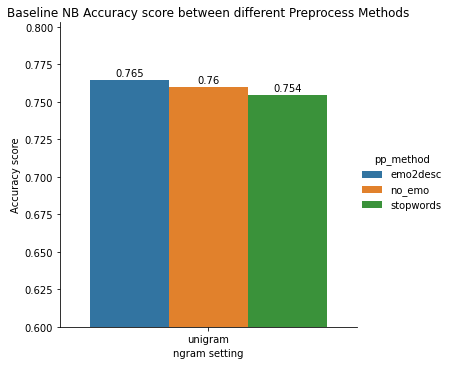

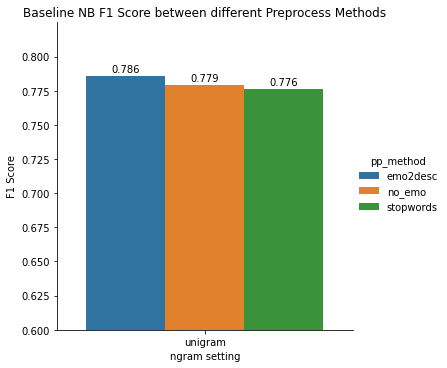

In [4]:
import importlib
import evaluation_tool
importlib.reload(evaluation_tool)
from evaluation_tool import Evaluator

nb_evaluator = Evaluator("Baseline NB", dev_l)
nb_evaluator.add_prediction(prediction_emo, pp_method="emo2desc")
nb_evaluator.add_prediction(prediction_no_emo, pp_method="no_emo")
nb_evaluator.add_prediction(prediction_sw, pp_method="stopwords")

nb_evaluator.plot(score='ac')
nb_evaluator.plot(score='f1')

## Logistic Regression Classifer for Twitter Sentiment Analysis
The 1st model to use is Logistic Regression with customised setting to achieve a
greater accuracy score on the development samples

By comparing 3 sets of ngram range when using count victorisers from unigram,
bigram, then unigram,bigram and trigram.

In [5]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

def lr_predict(train_f, train_l, dev_f, ngram='unigram'):
    """Train a logistic regression .
    """

    ngram_types = ['unigram', 'bigram','1-3gram']
    if ngram not in ngram_types:
        raise ValueError("Invalid ngram. Expected one of: %s" % ngram_types)

    if (ngram == 'unigram'):
        ngram = (1,1)
    elif(ngram == 'bigram'):
        ngram = (2,2)
    elif(ngram == '1-3gram'):
        ngram = (1,3)

    # initlise count vectoriser and transform training and development features
    vectoriser = CountVectorizer(ngram_range=ngram)
    vectoriser.fit(train_f)
    train_f = vectoriser.transform(train_f)
    dev_f = vectoriser.transform(dev_f)

    # Training LR
    lr = LogisticRegression(solver='liblinear')
    lr.fit(train_f, train_l)

    # Predict with LR
    prediction = lr.predict(dev_f)

    print("Training Feature shape: ", train_f.shape, "ngram_range=",ngram)
    return prediction


# using LR to predict target labels of development twitter data with unigram
ngram = 'unigram'
lr_emo = lr_predict(train_f_emo, train_l, dev_f_emo)
lr_no_emo = lr_predict(train_f_no_emo, train_l, dev_f_no_emo)
lr_sw = lr_predict(train_f_sw, train_l, dev_f_sw)

# using LR to predict target labels of development twitter data with bigram (2,2)
ngram = 'bigram'
lr_emo_bigram = lr_predict(train_f_emo, train_l, dev_f_emo, ngram)
lr_no_emo_bigram = lr_predict(train_f_no_emo, train_l, dev_f_no_emo, ngram)
lr_sw_bigram = lr_predict(train_f_sw, train_l, dev_f_sw, ngram)

# using LR to predict target labels of development twitter data with 1-3grams (1,3)
ngram = '1-3gram'
lr_emo_1_3gram = lr_predict(train_f_emo, train_l, dev_f_emo, ngram)
lr_no_emo_1_3gram = lr_predict(train_f_no_emo, train_l, dev_f_no_emo, ngram)
lr_sw_1_3gram = lr_predict(train_f_sw, train_l, dev_f_sw, ngram)


Training Feature shape:  (159253, 91192) ngram_range= (1, 1)
Training Feature shape:  (159253, 90715) ngram_range= (1, 1)
Training Feature shape:  (159253, 91156) ngram_range= (1, 1)
Training Feature shape:  (159253, 729479) ngram_range= (2, 2)
Training Feature shape:  (159253, 723423) ngram_range= (2, 2)
Training Feature shape:  (159253, 729370) ngram_range= (2, 2)
Training Feature shape:  (159253, 2127309) ngram_range= (1, 3)
Training Feature shape:  (159253, 2113918) ngram_range= (1, 3)
Training Feature shape:  (159253, 1705547) ngram_range= (1, 3)


## Accuracy on between ngram ranges when used against LR Classifier

Logistic Regression accuracy & F1 score with unigram
Pre-process Method: emo2desc		Accuracy Score: 0.7798	Macro F1: 0.7996
Pre-process Method: no_emo		Accuracy Score: 0.7756	Macro F1: 0.7943
Pre-process Method: stopwords		Accuracy Score: 0.7593	Macro F1: 0.7792

Logistic Regression accuracy & F1 score with bigram
Pre-process Method: emo2desc		Accuracy Score: 0.7373	Macro F1: 0.7492
Pre-process Method: no_emo		Accuracy Score: 0.7365	Macro F1: 0.7481
Pre-process Method: stopwords		Accuracy Score: 0.6249	Macro F1: 0.6142

Logistic Regression accuracy & F1 score with 1-to-3 gram
Pre-process Method: emo2desc		Accuracy Score: 0.795	Macro F1: 0.813
Pre-process Method: no_emo		Accuracy Score: 0.7928	Macro F1: 0.8097
Pre-process Method: stopwords		Accuracy Score: 0.7718	Macro F1: 0.7899


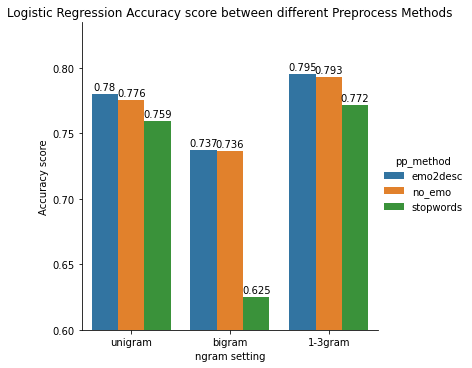

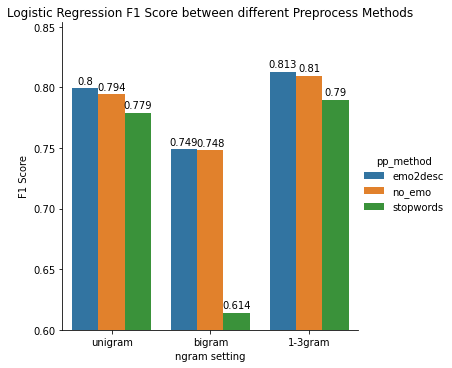

In [6]:
lr_evaluator = Evaluator("Logistic Regression", dev_l)

# add the predictions into evaluator
print("Logistic Regression accuracy & F1 score with unigram")
lr_evaluator.add_prediction(lr_emo, pp_method="emo2desc")
lr_evaluator.add_prediction(lr_no_emo, pp_method="no_emo")
lr_evaluator.add_prediction(lr_sw, pp_method="stopwords")

print()
print("Logistic Regression accuracy & F1 score with bigram")
ngram = 'bigram'
lr_evaluator.add_prediction(lr_emo_bigram, pp_method="emo2desc", ngram=ngram)
lr_evaluator.add_prediction(lr_no_emo_bigram, pp_method="no_emo", ngram=ngram)
lr_evaluator.add_prediction(lr_sw_bigram, pp_method="stopwords", ngram=ngram)

print()
print("Logistic Regression accuracy & F1 score with 1-to-3 gram")
ngram = '1-3gram'
lr_evaluator.add_prediction(lr_emo_1_3gram, pp_method="emo2desc", ngram=ngram)
lr_evaluator.add_prediction(lr_no_emo_1_3gram, pp_method="no_emo", ngram=ngram)
lr_evaluator.add_prediction(lr_sw_1_3gram, pp_method="stopwords", ngram=ngram)

# plot scores
lr_evaluator.plot(score='ac')
lr_evaluator.plot(score='f1')

## SGD Classifier for Twitter Sentiment Analysis
The 2nd ML model to use is SGD(stochastic gradient descent) Classifier
By comparing 3 sets of ngram range when using count victorisers from unigram,
bigram, then unigram,bigram and trigram.

In [10]:
from sklearn.linear_model import SGDClassifier

def sgd_predict(train_f, train_l, dev_f, ngram='unigram'):

    ngram_types = ['unigram', 'bigram','1-3gram']
    if ngram not in ngram_types:
        raise ValueError("Invalid ngram. Expected one of: %s" % ngram_types)

    if (ngram == 'unigram'):
        ngram = (1,1)
    elif(ngram == 'bigram'):
        ngram = (2,2)
    elif(ngram == '1-3gram'):
        ngram = (1,3)

    # initlise count vectoriser and transform training and development features
    vectoriser = CountVectorizer(ngram_range=ngram)
    vectoriser.fit(train_f)
    train_f = vectoriser.transform(train_f)
    dev_f = vectoriser.transform(dev_f)

    # Training SGD Classifier
    sgdc = SGDClassifier()
    sgdc.fit(train_f, train_l)

    # Predict with LR
    prediction = sgdc.predict(dev_f)

    return prediction


# using LR to predict target labels of development twitter data with unigram (1,1)
sgd_emo = sgd_predict(train_f_emo, train_l, dev_f_emo)
sgd_no_emo = sgd_predict(train_f_no_emo, train_l, dev_f_no_emo)
sgd_sw = sgd_predict(train_f_sw, train_l, dev_f_sw, ngram)

# using LR to predict target labels of development twitter data with bigram (2,2)
ngram = 'bigram'
sgd_emo_bigram = sgd_predict(train_f_emo, train_l, dev_f_emo, ngram)
sgd_no_emo_bigram = sgd_predict(train_f_no_emo, train_l, dev_f_no_emo, ngram)
sgd_sw_bigram = sgd_predict(train_f_sw, train_l, dev_f_sw, ngram)

# using LR to predict target labels of development twitter data with 1-3grams (1,3)
ngram = '1-3gram'
sgd_emo_1_3gram = sgd_predict(train_f_emo, train_l, dev_f_emo, ngram)
sgd_no_emo_1_3gram = sgd_predict(train_f_no_emo, train_l, dev_f_no_emo, ngram)
sgd_sw_1_3gram = sgd_predict(train_f_sw, train_l, dev_f_sw, ngram)

SGD Classifier accuracy & F1 score with unigram
Pre-process Method: emo2desc		Accuracy Score: 0.7806	Macro F1: 0.7983
Pre-process Method: no_emo		Accuracy Score: 0.7767	Macro F1: 0.7929
Pre-process Method: stopwords		Accuracy Score: 0.7723	Macro F1: 0.79

SGD Classifier accuracy & F1 score with bigram
Pre-process Method: emo2desc		Accuracy Score: 0.732	Macro F1: 0.7412
Pre-process Method: no_emo		Accuracy Score: 0.7309	Macro F1: 0.7399
Pre-process Method: stopwords		Accuracy Score: 0.6316	Macro F1: 0.6264

SGD Classifier accuracy & F1 score with 1-to-3 gram
Pre-process Method: emo2desc		Accuracy Score: 0.7971	Macro F1: 0.8145
Pre-process Method: no_emo		Accuracy Score: 0.794	Macro F1: 0.8105
Pre-process Method: stopwords		Accuracy Score: 0.7731	Macro F1: 0.7906


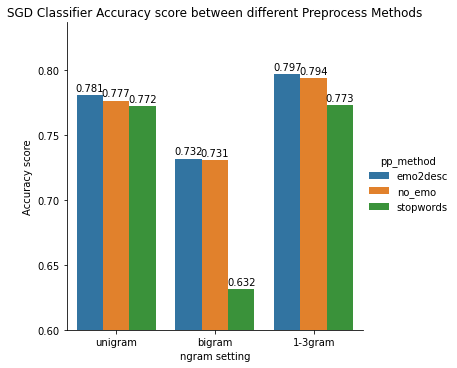

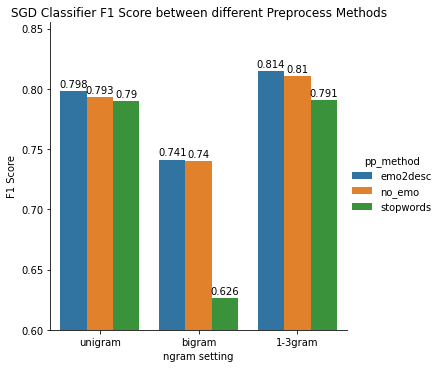

In [11]:
sgd_evaluator = Evaluator("SGD Classifier", dev_l)

# add the predictions into evaluator
print("SGD Classifier accuracy & F1 score with unigram")
sgd_evaluator.add_prediction(sgd_emo, pp_method="emo2desc")
sgd_evaluator.add_prediction(sgd_no_emo, pp_method="no_emo")
sgd_evaluator.add_prediction(sgd_sw, pp_method="stopwords")

print()
print("SGD Classifier accuracy & F1 score with bigram")
ngram = 'bigram'
sgd_evaluator.add_prediction(sgd_emo_bigram, pp_method="emo2desc", ngram=ngram)
sgd_evaluator.add_prediction(sgd_no_emo_bigram, pp_method="no_emo", ngram=ngram)
sgd_evaluator.add_prediction(sgd_sw_bigram, pp_method="stopwords", ngram=ngram)

print()
print("SGD Classifier accuracy & F1 score with 1-to-3 gram")
ngram = '1-3gram'
sgd_evaluator.add_prediction(sgd_emo_1_3gram, pp_method="emo2desc", ngram=ngram)
sgd_evaluator.add_prediction(sgd_no_emo_1_3gram, pp_method="no_emo", ngram=ngram)
sgd_evaluator.add_prediction(sgd_sw_1_3gram, pp_method="stopwords", ngram=ngram)

# plot scores
sgd_evaluator.plot(score='ac')
sgd_evaluator.plot(score='f1')

# Prediction Using Test Data
Using the both models and ngram that has produced the best accuracy scores, we can predict
the test tweet's sentiment values

In [9]:
# load preprocessed development data with emoji/emotions description
test_f_emo, test_l, test_id = load_data("data/test_f_emo.csv")

def predict_test(train_f, train_l, test_f, test_id, model_func, ngram, filename):
    """Predict a test on a dataset
    """
    # predict the test labels
    prediction = model_func(train_f, train_l, test_f, ngram)

    # save data in csv file
    df = pd.DataFrame({'sentiment': prediction,
                       'tweet_id': test_id})
    df.to_csv(filename, index=False)

sgdc_csv = "results/SGDC_results.csv"
lr_csv = "results/lr_results.csv"

ngram = '1-3gram'
predict_test(train_f_emo, train_l, test_f_emo, test_id, lr_predict, ngram, lr_csv)
predict_test(train_f_emo, train_l, test_f_emo, test_id, sgd_predict, ngram, sgdc_csv)


Training Feature shape:  (159253, 2127309) ngram_range= (1, 3)
